Here we examine the behavior of the TNFa treatment, which resulted in increased viral count. An running hypothesis is that NFKb pathway activation actually stimulates viral replication. We corroborate this hypothesis by demonstrating that **NFKb pathway gene activity is correlated with viral load**.



In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sc.set_figure_params(dpi=100, frameon=False, color_map='Reds')
sc.logging.print_header()

/dss/dsshome1/02/di93zoj/.local/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


scanpy==1.9.3 anndata==0.8.0 umap==0.5.3 numpy==1.23.5 scipy==1.10.1 pandas==2.0.0 scikit-learn==1.2.2 statsmodels==0.13.5 python-igraph==0.10.4 pynndescent==0.5.8


In [3]:
adata = sc.read('2301_annot_patient_integrated_ambient_removed.h5ad')

In [4]:
pd.crosstab(adata.obs.treatment, adata.obs.patient)

patient               Patient 1  Patient 2  Patient 3  Patient 4
treatment                                                       
BB94                          0          0          0       2625
DMSO                          0          0          0       1541
Gilteritinib                  0          0          0       2590
IFNL                          0          0       3957       3462
IFNa                       3627       5706       3458       3360
IFNa + TNFa                3712          0       5500       2914
IFNg                       3471       4131       4874       3404
IFNg + TGFb2                  0          0       3755       3160
Sorafenib                  3413          0       3943       4417
TGFb2                      3691       3703       4514       3504
TGFb2 + Tirapazamine          0          0       3168       3649
TNFa                       3245       3828       4552       2600
TNFa + IFNg                3354          0       3110       2771
TNFa + TGFb2               2652          0       3546       3101
TNFa + Tirapazamine        4164          0       3693       2460
Tirapazamine               3101       2327       4243       3605
mock                       6752       4888       8687       5732
nan                           0          0      29765      15034

/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


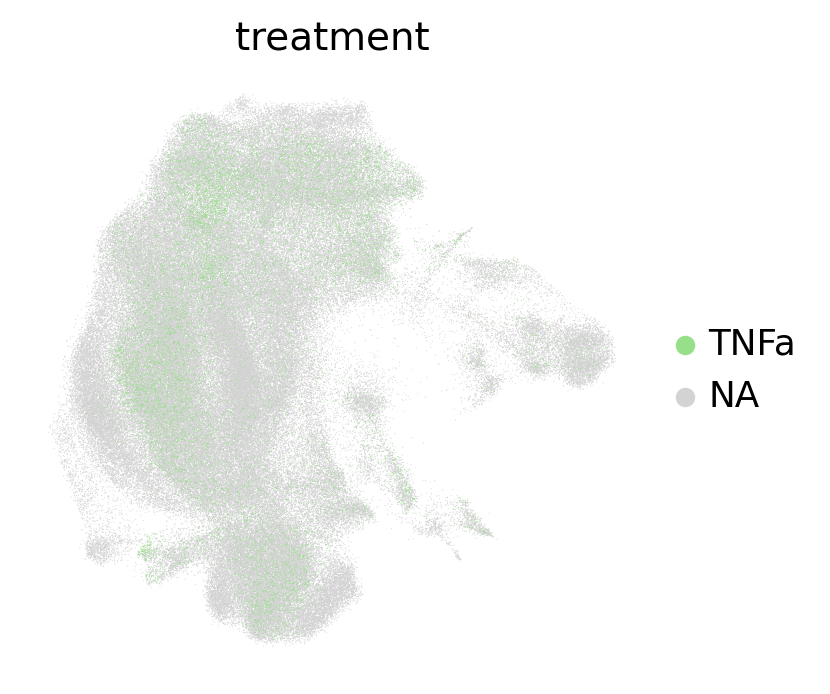

In [4]:
sc.pl.umap(adata, color='treatment', groups=['TNFa'])

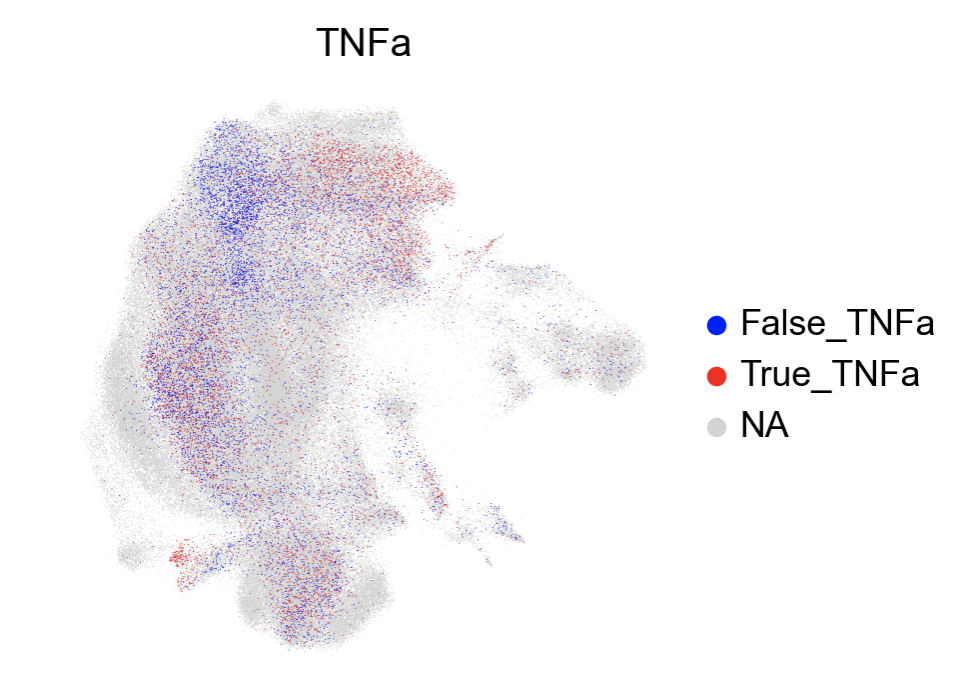

/home/yuge/miniconda3/envs/fa_base/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


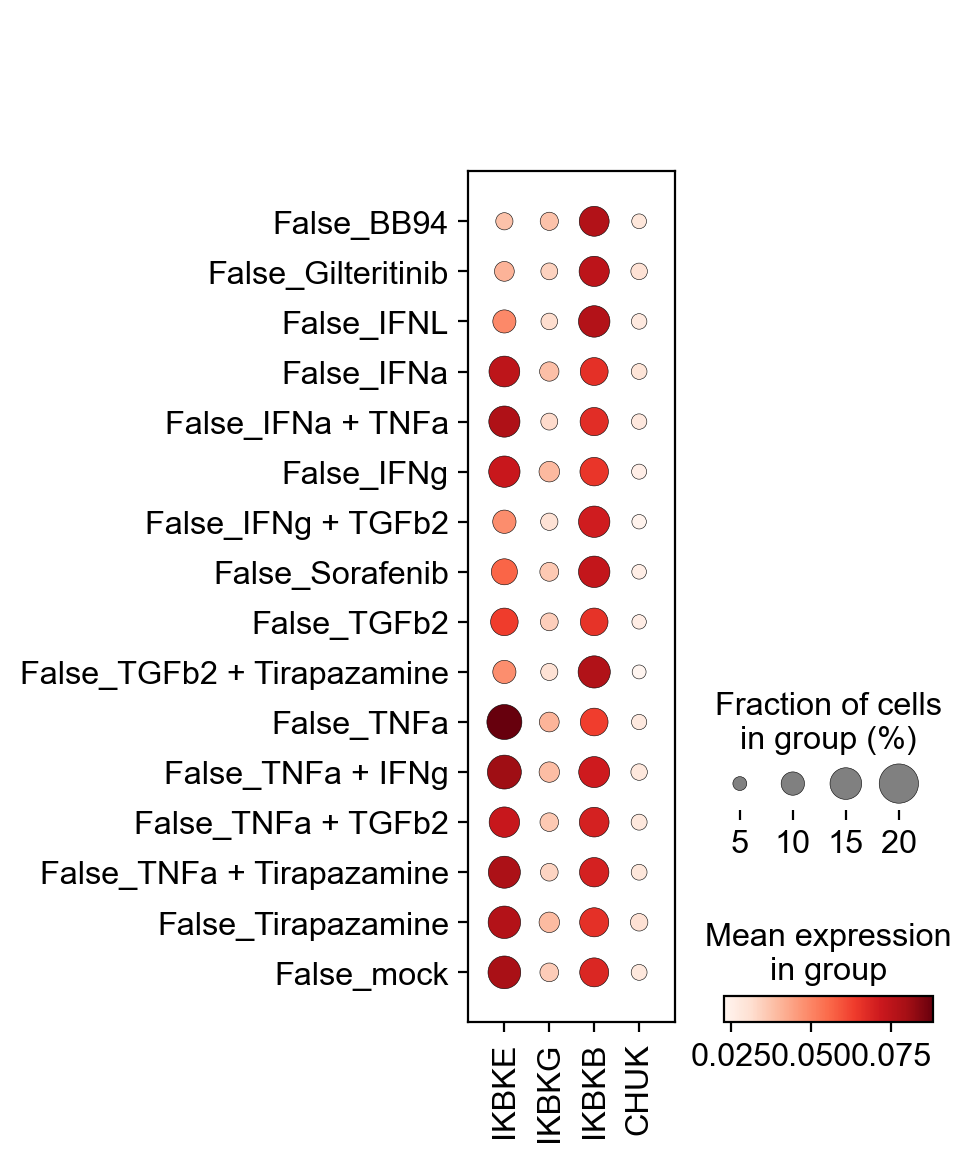

In [45]:
sc.pl.dotplot(
    adata[adata.obs.infected == 'False'],
    list(adata.var_names[adata.var_names.str.startswith('IKBK')]) + ['CHUK'],
    groupby=['infected', 'treatment'],
#     standard_scale='var', colorbar_title='scaled expression\nacross groups'
)

In [5]:
from utils import enrich, plot_volcano

In [6]:
subset = adata[adata.obs.infected == 'False']

In [7]:
sc.tl.rank_genes_groups(subset, groupby='treatment', groups=['TNFa'], method='wilcoxon')

/dss/dsshome1/02/di93zoj/.local/lib/python3.8/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


/dss/dsshome1/02/di93zoj/yuge/covid-perturbation/utils.py:133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['-log10(pvals)'] = -np.log10(df.pvals_adj.values)


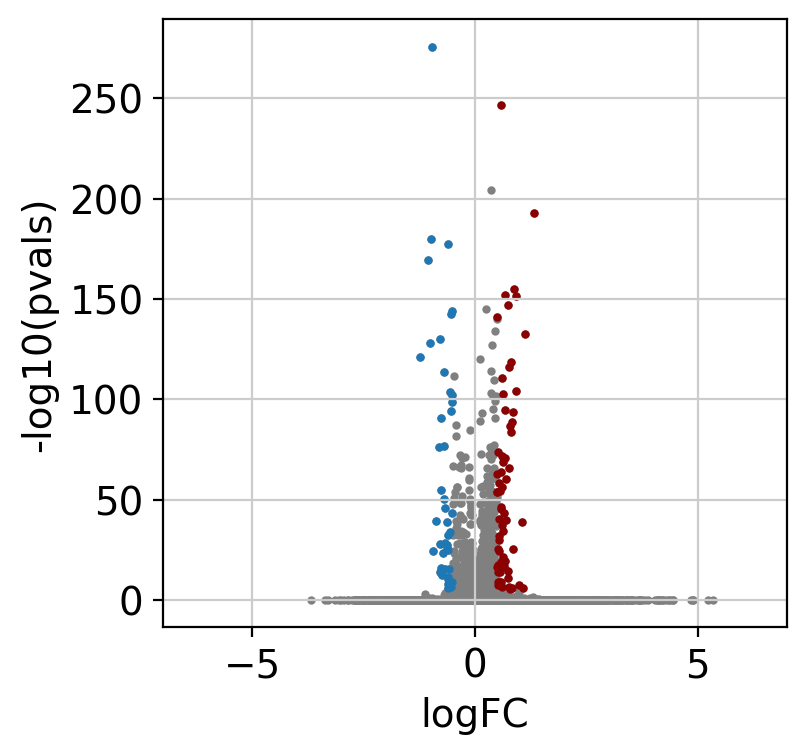

In [8]:
df, up, dn = plot_volcano(sc.get.rank_genes_groups_df(subset, group='TNFa'), fc_thresh=.5, logpval_thresh=5)

In [9]:
up

array(['NCOA7', 'MSMB', 'CXCL8', 'CD55', 'SLC34A2', 'CXCL1', 'CYBA',
       'TNFAIP2', 'LCN2', 'VMO1', 'CP', 'LYPD2', 'C3', 'SAA1', 'BPIFA1',
       'PI3', 'BPIFB1', 'CCL20', 'GDF15', 'EDN1', 'BCL2A1', 'RARRES1',
       'MUC5B', 'SCGB3A1', 'SAA2', 'C11orf96', 'TNFAIP3', 'CAPN13',
       'TMEM45A', 'AKR1C1', 'SERPINB2', 'CLDN10', 'DENND2C', 'MSLN',
       'TFPI2', 'RCAN1', 'FCGBP', 'ABCA13', 'KYNU', 'DNAJB9', 'CXCL6',
       'HLA-DRB5', 'IRAK3', 'HPGD', 'ANKRD36C', 'ANKRD37', 'RNASE1',
       'SLC19A2', 'WIPI1', 'PROM1', 'HMOX1', 'HNMT', 'RELB', 'NR4A3',
       'CNKSR3', 'ADM', 'OLFM4', 'PSTPIP2', 'LRRN1', 'PRXL2B', 'DOC2B',
       'SMIM31', 'SLC7A11', 'GSTA2', 'CAPN8', 'NLRP2', 'HOXB2'],
      dtype=object)

In [10]:
dn

array(['RSAD2', 'CXCL14', 'CDH6', 'HLA-DPB1', 'BTN3A2', 'LSP1', 'OAS3',
       'ARL4D', 'MX2', 'GBP4', 'DDX60', 'SERPING1', 'IRF9', 'SAMD9L',
       'IFITM1', 'HERC6', 'LGALS7B', 'IGFBP6', 'SPON2', 'IFI44', 'OAS2',
       'TAP1', 'HLA-F', 'IRF1', 'DDIT4', 'EPSTI1', 'EIF2AK2', 'KRT14',
       'IFIT3', 'IFIT1', 'PSMB9', 'BST2', 'MX1', 'KRT5', 'EGR1', 'S100A2',
       'DUSP1', 'ISG15', 'IFI44L', 'XAF1', 'STAT1', 'JUNB', 'IER2',
       'IFI6', 'TXNIP', 'IFI27', 'FOS'], dtype=object)

In [11]:
enrich(up, adata.var_names, sources=['KEGG'], return_full=True)

source      native                                               name   
0    KEGG  KEGG:04657                            IL-17 signaling pathway  \
1    KEGG  KEGG:05323                               Rheumatoid arthritis   
2    KEGG  KEGG:04064                       NF-kappa B signaling pathway   
3    KEGG  KEGG:04668                              TNF signaling pathway   
4    KEGG  KEGG:04061  Viral protein interaction with cytokine and cy...   
5    KEGG  KEGG:04216                                        Ferroptosis   
6    KEGG  KEGG:05202            Transcriptional misregulation in cancer   
7    KEGG  KEGG:05134                                      Legionellosis   
8    KEGG  KEGG:05418             Fluid shear stress and atherosclerosis   
9    KEGG  KEGG:04060             Cytokine-cytokine receptor interaction   
10   KEGG  KEGG:05133                                          Pertussis   
11   KEGG  KEGG:05140                                      Leishmaniasis   
12   KEGG  KEGG:04610                Complement and coagulation cascades   
13   KEGG  KEGG:04621                NOD-like receptor signaling pathway   
14   KEGG  KEGG:04062                        Chemokine signaling pathway   
15   KEGG  KEGG:05167    Kaposi sarcoma-associated herpesvirus infection   

     p_value  significant                                        description   
0   0.000004         True                            IL-17 signaling pathway  \
1   0.000944         True                               Rheumatoid arthritis   
2   0.001396         True                       NF-kappa B signaling pathway   
3   0.001812         True                              TNF signaling pathway   
4   0.008901         True  Viral protein interaction with cytokine and cy...   
5   0.008901         True                                        Ferroptosis   
6   0.009353         True            Transcriptional misregulation in cancer   
7   0.018884         True                                      Legionellosis   
8   0.020753         True             Fluid shear stress and atherosclerosis   
9   0.026788         True             Cytokine-cytokine receptor interaction   
10  0.026788         True                                          Pertussis   
11  0.026788         True                                      Leishmaniasis   
12  0.029600         True                Complement and coagulation cascades   
13  0.029768         True                NOD-like receptor signaling pathway   
14  0.035401         True                        Chemokine signaling pathway   
15  0.035401         True    Kaposi sarcoma-associated herpesvirus infection   

    term_size  query_size  intersection_size  effective_domain_size   
0          86          67                  7                  17686  \
1          84          67                  5                  17686   
2          99          67                  5                  17686   
3         111          67                  5                  17686   
4          92          67                  4                  17686   
5          40          67                  3                  17686   
6         178          67                  5                  17686   
7          57          67                  3                  17686   
8         133          67                  4                  17686   
9         255          67                  5                  17686   
10         74          67                  3                  17686   
11         70          67                  3                  17686   
12         79          67                  3                  17686   
13        166          67                  4                  17686   
14        181          67                  4                  17686   
15        180          67                  4                  17686   

    precision    recall    query       parents   
0    0.104478  0.081395  query_1  [KEGG:00000]  \
1    0.074627  0.059524  query_1  [KEGG:0

In [35]:
enrich(dn, adata.var_names, sources=['KEGG']).head()

name       p_value   
0                     Influenza A  9.326332e-09  \
1                     Hepatitis C  9.326332e-09   
2    Epstein-Barr virus infection  2.701851e-08   
3                         Measles  2.701851e-08   
4  Coronavirus disease - COVID-19  8.095876e-08   

                                       intersections  
0  [RSAD2, HLA-DPB1, OAS3, MX2, IRF9, OAS2, EIF2A...  
1  [RSAD2, OAS3, MX2, IRF9, OAS2, EIF2AK2, IFIT1,...  
2  [HLA-DPB1, OAS3, IRF9, OAS2, TAP1, HLA-F, EIF2...  
3  [OAS3, MX2, IRF9, OAS2, EIF2AK2, MX1, STAT1, FOS]  
4  [OAS3, MX2, IRF9, OAS2, EIF2AK2, MX1, ISG15, S...

### Scoring NFkB pathway in rest of data

Get genes from https://www.genome.jp/entry/pathway+hsa04064

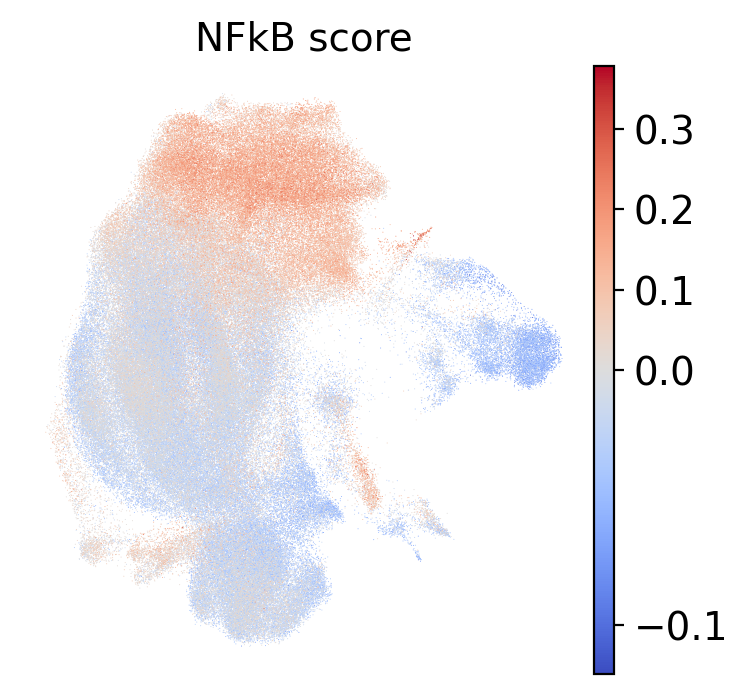

In [31]:
nfkb_genes = ['LCK','ZAP70','LAT','PLCG1','PRKCQ','IGH','SYK','LYN','BLNK','BTK','PLCG2','PRKCB','CARD10','CARD11','CARD14','BCL10','MALT1','IL1B','IL1R1','MYD88','IRAK1','IRAK4','TRAF6','TNF','TNFRSF1A','RIPK1','TRADD','TRAF2','TRAF5','BIRC2','BIRC3','EDA','EDAR','EDARADD','CYLD','EDA2R','RIGI','TRIM25','LBP','CD14','TLR4','LY96','TIRAP','TICAM2','TICAM1','CD40LG','CD40','TRAF3','TNFSF11','TNFRSF11A','LTA','LTB','TNFSF14','LTBR','MAP3K14','MAP3K7','TAB1','TAB2','TAB3','TNFSF13B','TNFRSF13C','IKBKG','CHUK','IKBKB','PARP1','PIAS4','UBE2I','ATM','PIDD1','ERC1','NFKBIA','NFKB1','RELA','CFLAR','XIAP','BCL2L1','BCL2','GADD45A','GADD45B','GADD45G','TRAF1','BCL2A1','NFKB2','CXCL8','TNFAIP3','PTGS2','CCL4','CCL4L2','CCL4L1','CXCL1','CXCL2','CXCL3','VCAM1','PLAU','CSNK2A1','CSNK2A2','CSNK2A3','CSNK2B','RELB','CCL13','CCL19','CCL21','CXCL12','ICAM1']
overlap = list(set(nfkb_genes) & set(adata.var_names))
print(overlap)

sc.tl.score_genes(adata, overlap, score_name='NFkB score')
sc.pl.umap(adata, color='NFkB score', cmap='coolwarm', vcenter=0)
plt.show()

# shift all to positive
adata.obs['NFkB score'] -= min(adata.obs['NFkB score'])

In [21]:
# adata[adata.obs.infected == 'False'].obs[['NFkB score', 'treatment']].groupby('treatment').mean().sort_values(by='NFkB score').plot.barh()
# adata[(adata.obs.patient == 'Patient 4') & (adata.obs.infected == 'False')].obs[['NFkB score', 'treatment']].groupby('treatment').mean().sort_values(by='NFkB score').plot.barh()
# plt.grid(None)
# plt.legend(loc='upper left')

Text(0.5, 1.0, 'Correlation of percentage of\nviral transcripts in a cell w/ NFkB activity')

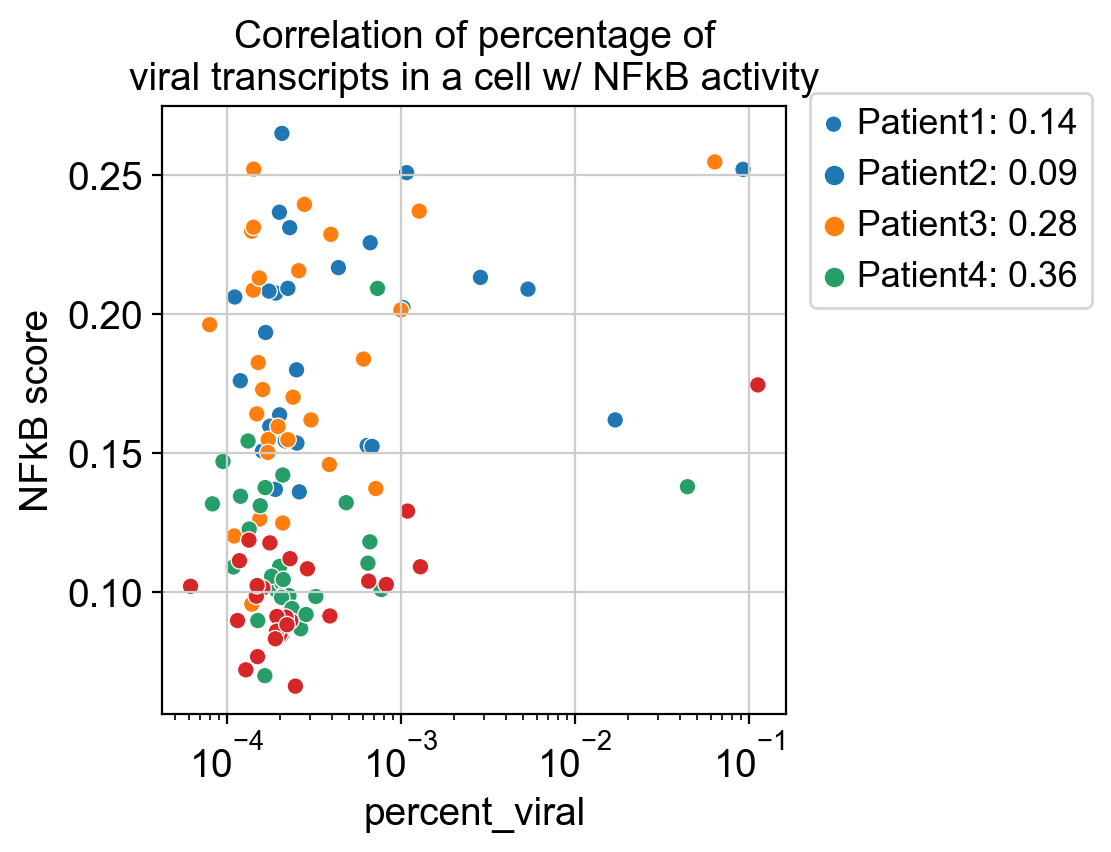

In [162]:
df = adata.obs[['percent_viral', 'NFkB score', 'patient', 'leiden']]
df = df[df.percent_viral > .000001]  # because sparsity deflates pearson and spearman

corr = []
from scipy.stats import pearsonr
for p in df.patient.cat.categories:
    score = df[df.patient == p]['NFkB score'].values
    viralp = df[df.patient == p].percent_viral.values
    corr.append(pearsonr(score, viralp)[0])


sns.scatterplot(
    data=df.groupby(['patient', 'leiden']).mean().reset_index(),
    x='percent_viral',
    y='NFkB score',
    hue='patient'
)
plt.xscale('log')
plt.legend([f'Patient{i+1}: {corr[i]:.2f}' for i in range(4)], bbox_to_anchor=(1.01, 1.05))
plt.title('Correlation of percentage of\nviral transcripts in a cell w/ NFkB activity')

However, we also see that the NFKb pathway is more expressed in a subset of cells - the immune responding epithelial subtype (not expected). This increase in NFKb score is uniform across all 4 patients.

/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


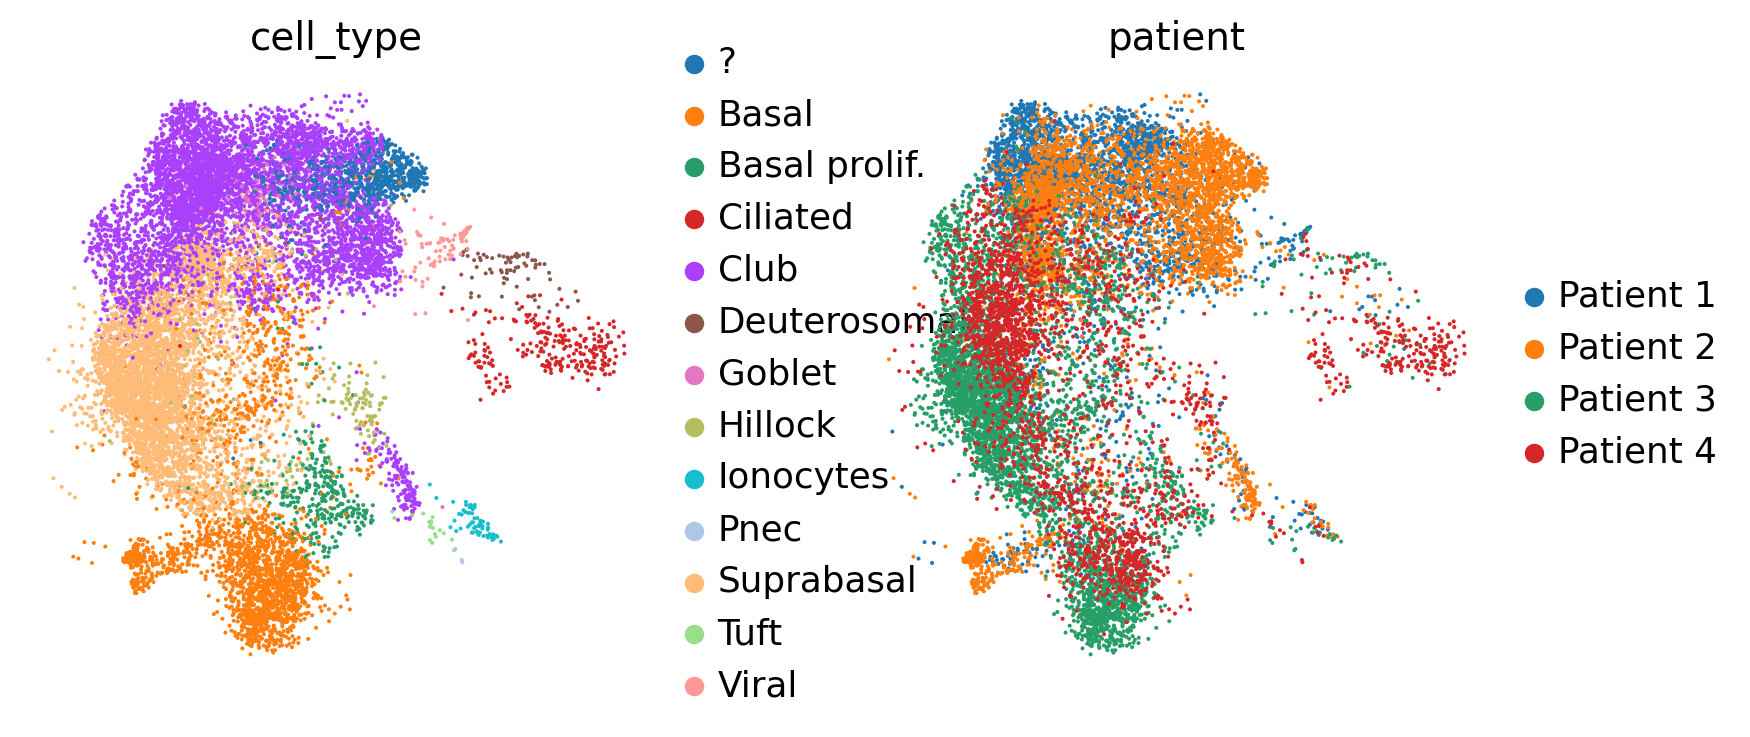

In [41]:
sc.pl.umap(adata[adata.obs.treatment == 'TNFa'], color=['cell_type', 'patient'])

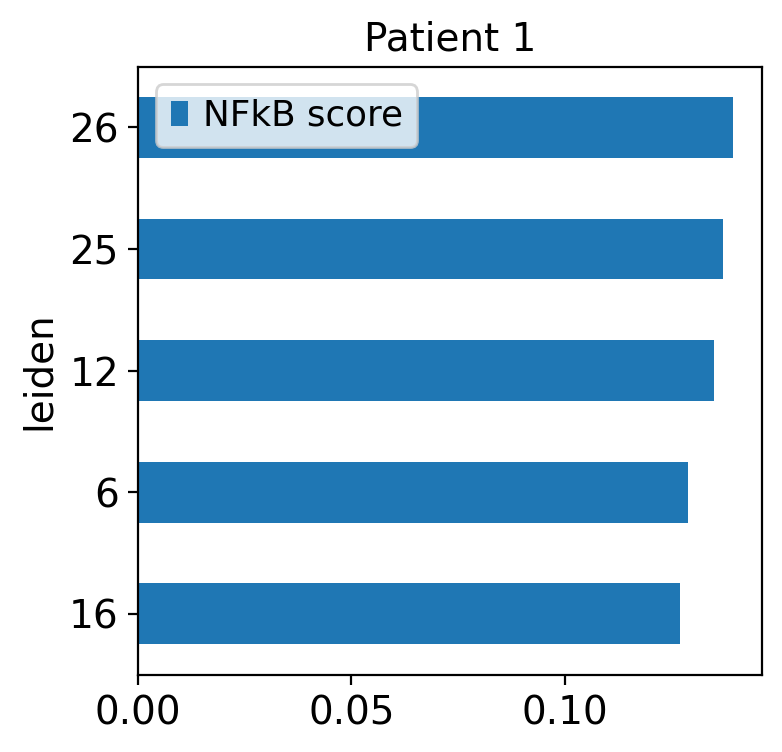

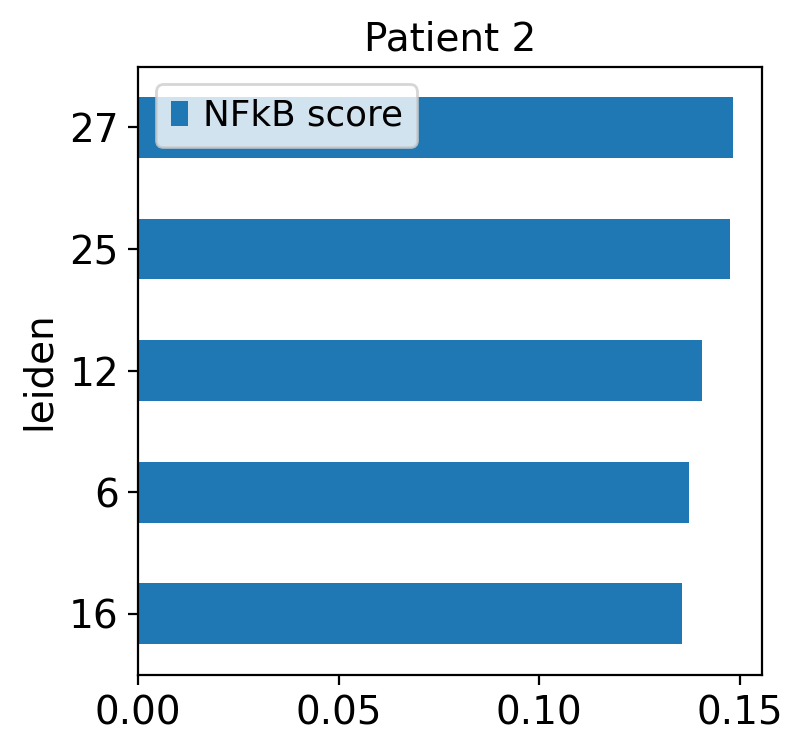

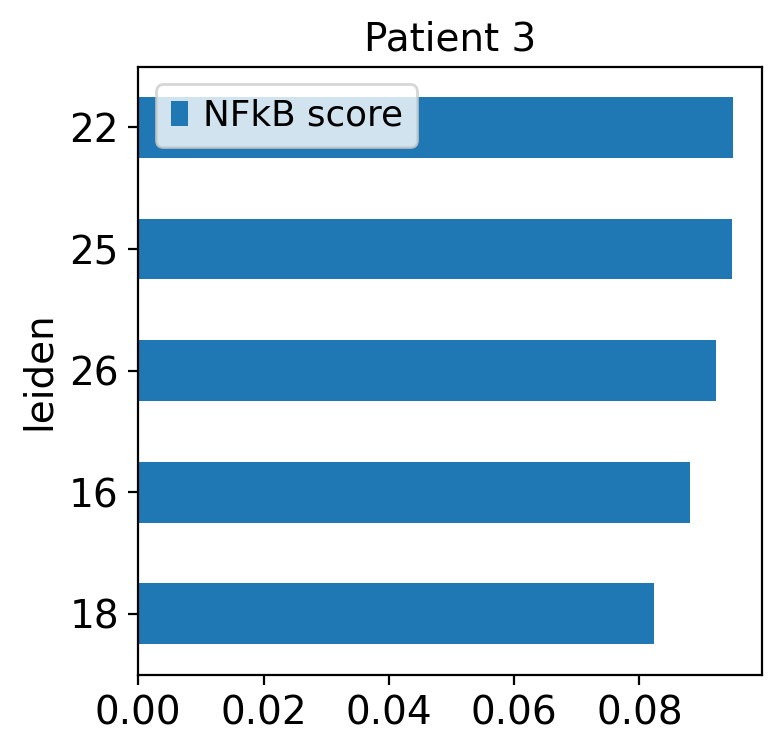

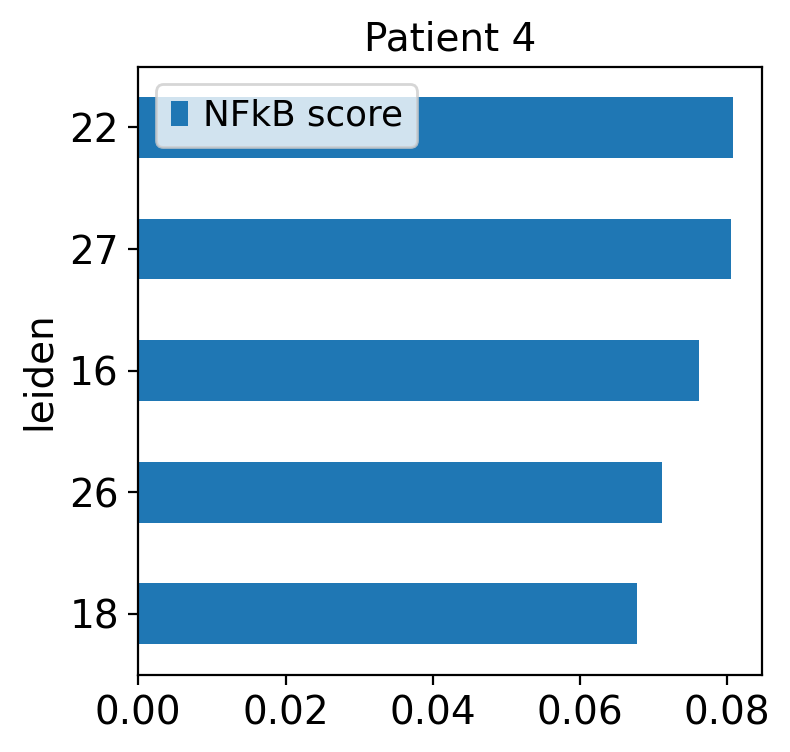

In [56]:
for p in adata.obs.patient.unique():
    adata[(adata.obs.patient == p) & (adata.obs.infected == 'False')].obs[['NFkB score', 'leiden']].groupby('leiden').mean().sort_values(by='NFkB score').head().plot.barh()
    plt.grid(None)
    plt.legend(loc='upper left')
    plt.title(p)
    plt.show()

In Patient 3 and 4, it is also up-regulated in cluster 22.

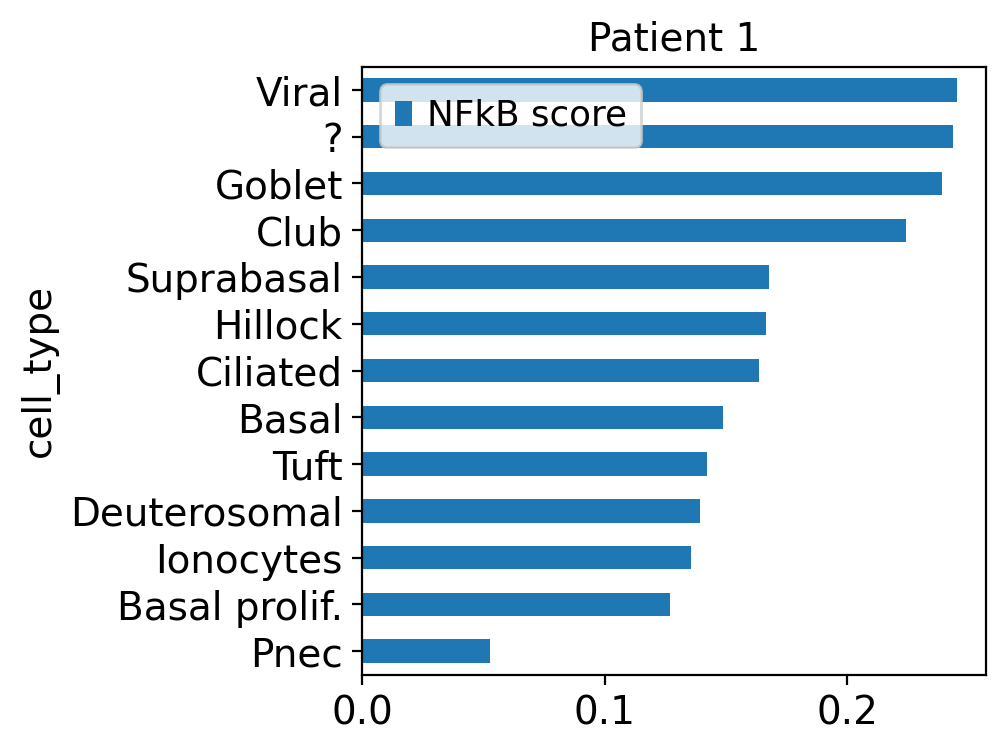

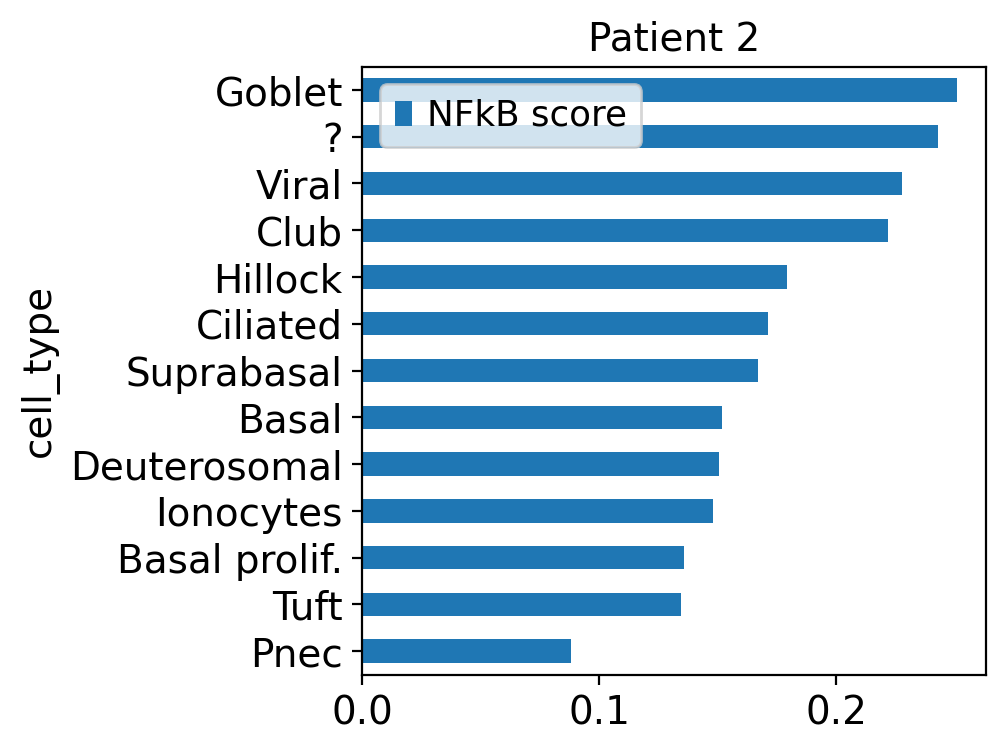

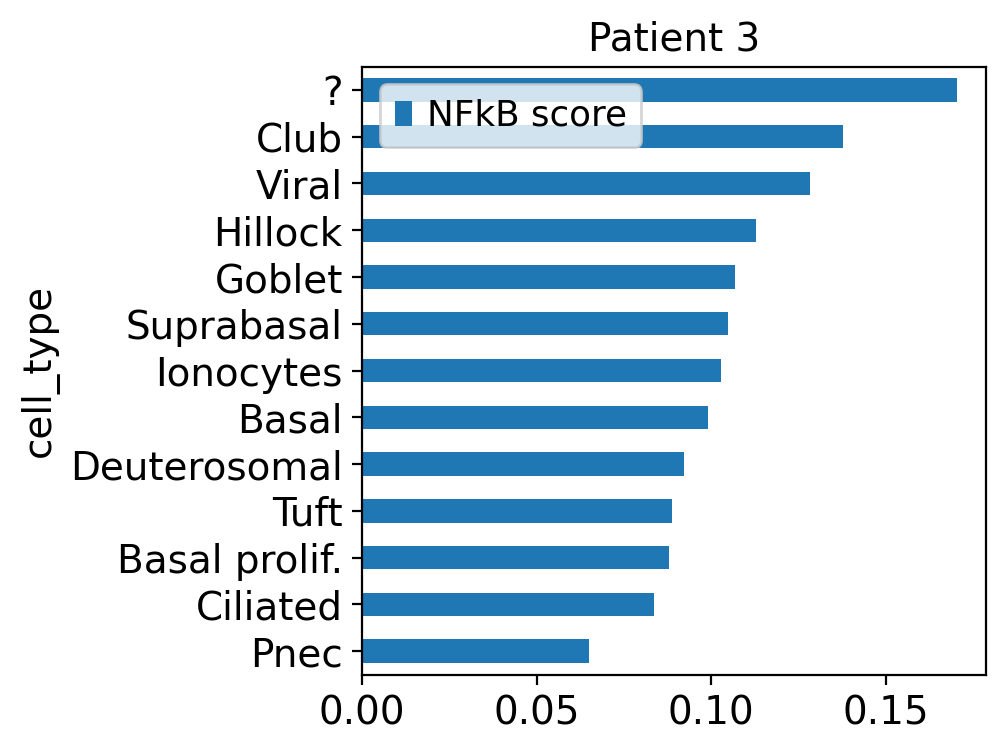

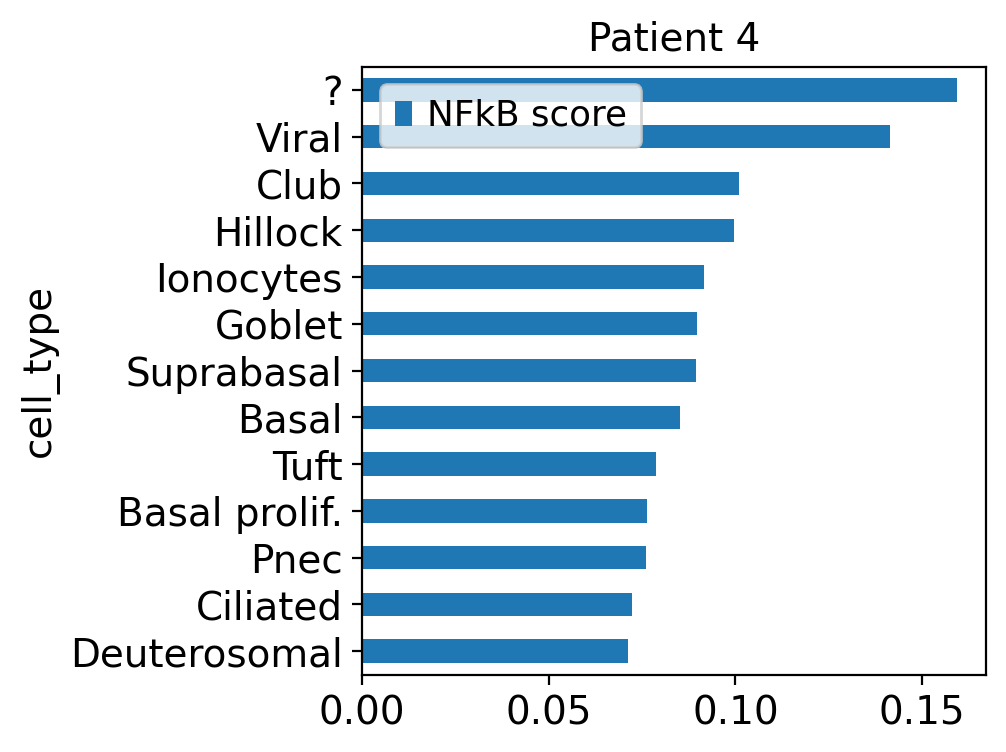

In [42]:
for p in adata.obs.patient.unique():
    adata[(adata.obs.patient == p) & (adata.obs.infected == 'False')].obs[['NFkB score', 'cell_type']].groupby('cell_type').mean().sort_values(by='NFkB score').plot.barh()
    plt.grid(None)
    plt.legend(loc='upper left')
    plt.title(p)
    plt.show()

Viral count per population:

/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


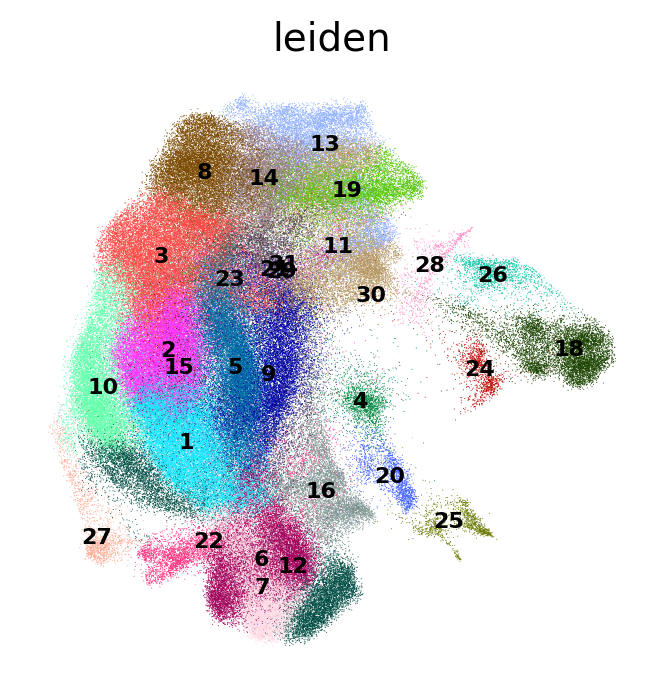

In [52]:
sc.pl.umap(adata, color='leiden', legend_loc='on data', legend_fontsize=8)

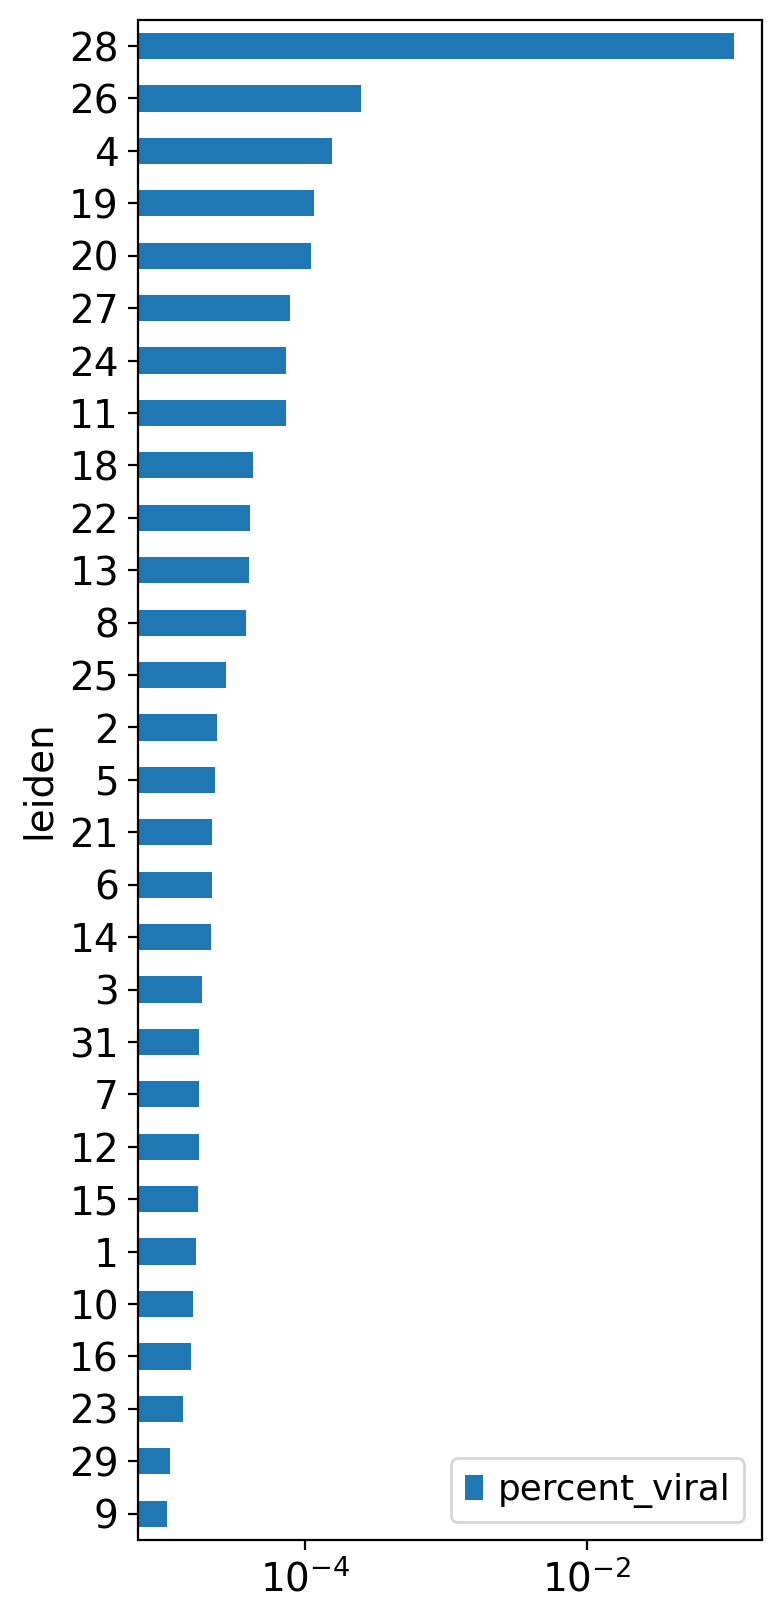

In [54]:
adata[adata.obs.infected == 'True'].obs[['percent_viral', 'leiden']].groupby('leiden').mean().sort_values(by='percent_viral').plot.barh(figsize=(4, 10))
plt.grid(None)
plt.legend(loc='lower right')
plt.xscale('log')
plt.show()

Is it possible that the NFKb pathway induces TMPRSS2 expression, promoting viral entry?

/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


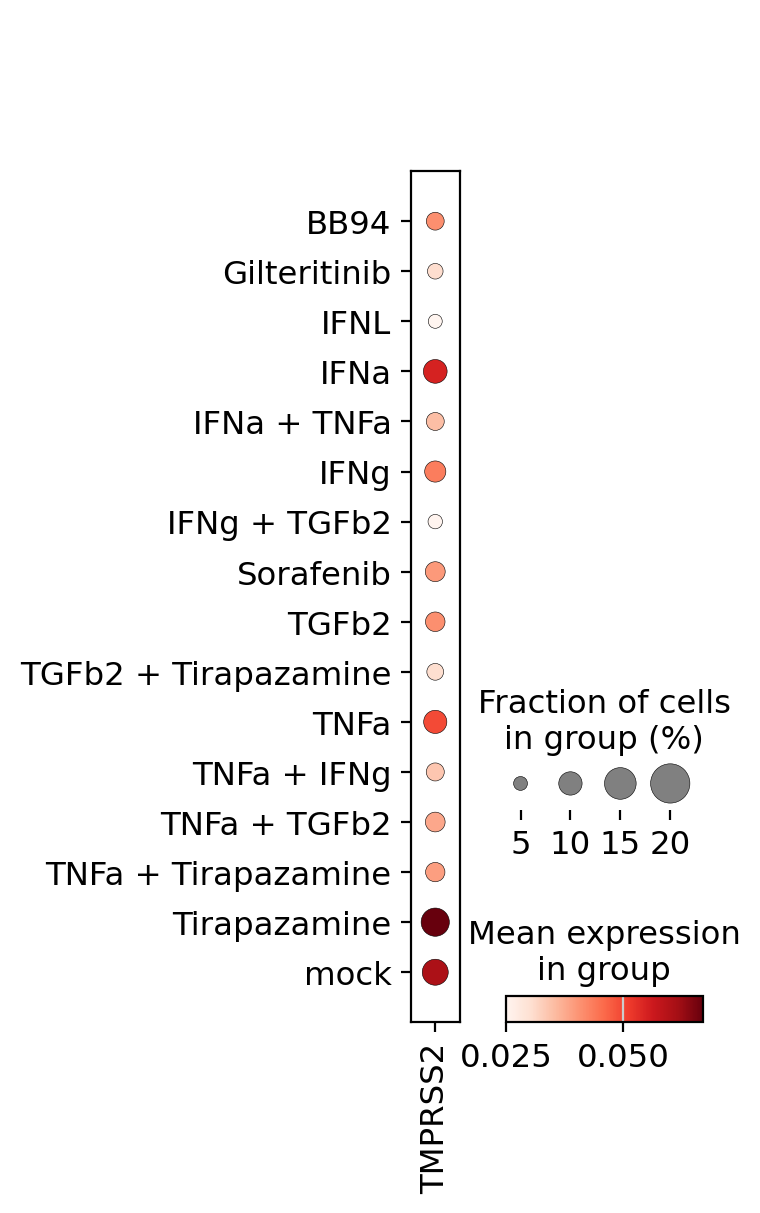

In [59]:
sc.pl.dotplot(adata[adata.obs.infected == 'False'], var_names='TMPRSS2', groupby='treatment')